# Лабораторная работа 5. Логистическая регрессия

### Задание 1. Построить модель линейной регрессии

**Задание 1.1.** Постройте модель линейной регрессии (с функцией ошибки MSE, без регуляризации) для датасета из лекции.  

Можно использовать функцию построения модели на основе нормального уравнения из первой работы.  

Выведите веса модели.

In [24]:
X = [1, 2, 3, 5, 6, 7]
y = [0, 0, 0, 1, 1, 1]

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Использование метода из scikit-learn
# Датасет
X = np.array([1, 2, 3, 5, 6, 7]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1])

# Создаем модель линейной регрессии
model = LinearRegression(fit_intercept=True)

# Обучаем модель
model.fit(X, y)

# Выводим веса модели
print("Веса модели:")
print(f"w0:\t {model.intercept_}")
print(f"w:\t {model.coef_[0]}")

Веса модели:
w0:	 -0.3571428571428571
w:	 0.21428571428571427


In [3]:
# использование решения из л.р. № 1
# Функция нахождения вектора весов на основе нормального уравнения 
def get_weight(X, y):
    X = np.array([np.ones(X.shape[0]), X]).T
    w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return w  # Возвращаем вектор весов

X = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])
w = get_weight(X, y)
print(f"Вектор весов:\nw = {w}")
w_lin_reg = w

Вектор весов:
w = [-0.35714286  0.21428571]


**Задание 1.2.** Нарисуйте датасет и модель на плоскости:

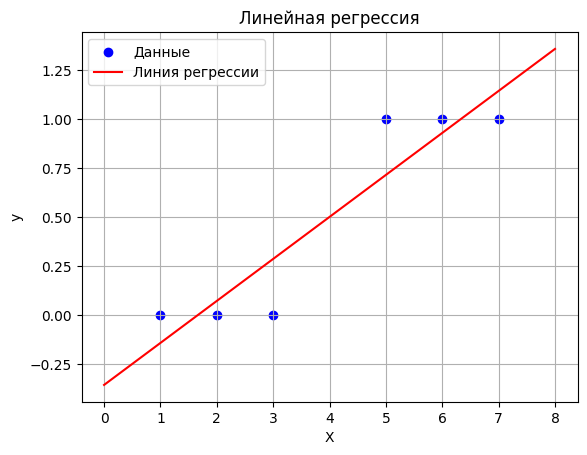

In [4]:
# Генерируем значения для прямой регрессии
X_line = np.linspace(0, 8, 100).reshape(-1, 1)  # Значения X для построения линии
y_line = model.predict(X_line)  # Предсказания модели для этих значений X

# Визуализация
plt.scatter(X, y, color='blue', label='Данные')  # Точки датасета
plt.plot(X_line, y_line, color='red', label='Линия регрессии')  # Линия регрессии
plt.title('Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Задание 2. Выведите выражение для изменения весов в алгоритме градиентного спуска
Напишите на листке вывод градиента функции ошибки кросс-энтропия в векторно-матричном виде и для отдельного компонента.  

Отдельно выведите выражение производной сигмоидальной функции через саму функцию.  

Приведите также полное выражение для изменения весов в алгоритме градиентного спуска – в векторно-матричном виде и для отдельного компонента.

Функция ошибки кросс-энтропия:
$$\log P(\vec{y} \mid X) = - \sum_{i=1}^{l} \left( y_i \log a(\vec{x}_i) + (1 - y_i) \log \left( 1 - \log a(\vec{x}_i) \right) \right) \rightarrow \min_{\vec{w}}$$

Функция ошибки кросс-энтропия на одном объекте:
$$L(a(\vec{x}_i)) = 
\begin{cases} 
-\log a(\vec{x}_i), & \text{если } y_i = 1 \\
-\log \left( 1 - \log a(\vec{x}_i) \right), & \text{если } y_i = 0 
\end{cases}$$

$$\text{где } a(\vec{x}_i) = \sigma \left( z = \sum_{i=1}^{l} w_i x_i \right) = \frac{1}{1 + e^{-z}}$$

Вывод градиента:
$$\nabla \log P(\vec{y} \mid X) = \sum_{i=1}^{l} \frac{\partial \log P(\vec{y} \mid X)}{\partial w_i}$$

Для отдельного компонента:
$$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_i}$$
$$\frac{\partial L}{\partial a} = \frac{\partial}{\partial a} \left( - \left( y_i \log a \left( \vec{x}_i \right) + \left( 1 - y_i \right) \log \left( 1 - \log a \left(\vec{x}_i \right) \right) \right) \right) = - y_i \frac{1}{a \left(\vec {x}_i \right)} - \left( -1 \right) \frac{1 - y_i}{1 - a \left( \vec{x}_i \right)} = - \frac{y_i}{a \left(\vec{x}_i \right)} + \frac{1 - y_i}{1 - a \left(\vec{x}_i \right)}$$
$$\frac{\partial a}{\partial z} = \frac{\partial}{\partial z} \left(\frac{1}{1 + e^{-z}} \right) = - \frac{\left(1 + e^{-z} \right)^{'}}{\left(1 + e^{-z} \right)^2} = - \frac{-e^{-z}}{\left(1 + e^{-z} \right)^2} = \frac{1}{\left(1 + e^{-z} \right)} \cdot \frac{e^{-z}}{\left(1 + e^{-z} \right)} = a \cdot \left(1 - \frac{1}{\left(1 + e^{-z} \right)} \right) = a \cdot \left(1 - a \right)$$
$$\frac{\partial z}{\partial w_i} = \left(w_0 + w_1 \cdot x_1 + \dots + w_i \cdot x_i + \dots + w_l \cdot x_l \right)^{'} = x_i$$
Таким образом, 
$$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_i} = $$

### Задание 3. Напишите функцию обучения логистической регрессии на основе кросс-энтропии и градиентного спуска

**Задание 3.1.** Напишите и протестируйте функцию сигмоиды. Нарисуйте её график и график её производной.

In [ ]:
# Функция сигмоиды
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
print(sigmoid(10))

0.9999546021312976


In [6]:
# Функция производной сигмоиды
def df_sigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

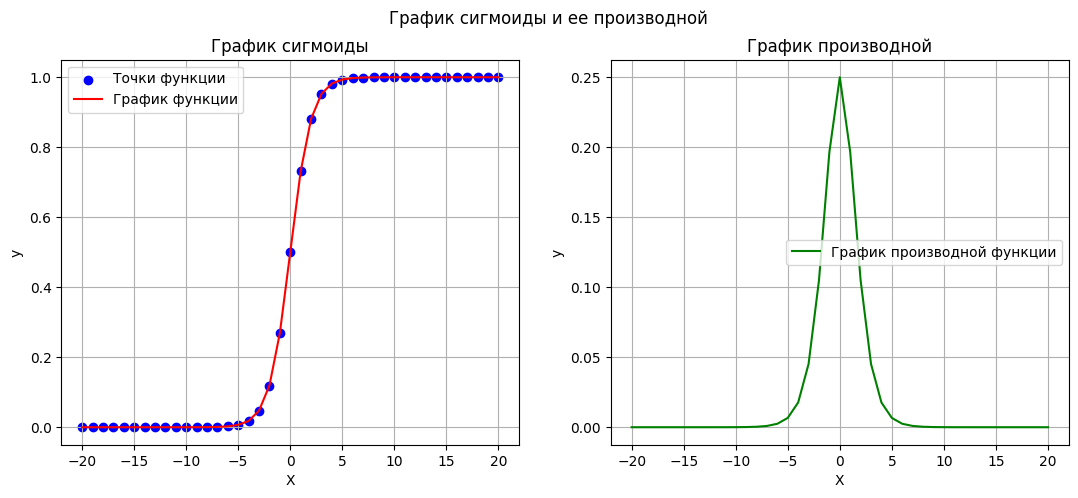

In [7]:
# Генерируем значения для построения графиков
X_line = [x for x in range(-20, 21)]  # Значения X для построения линии
y_line = [sigmoid(x) for x in X_line]  # Значение функции для этих значений X
df_y_line = [df_sigmoid(x) for x in X_line]  # Значение производной функции для этих значений X

# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('График сигмоиды и ее производной')

# 1-ый график - График функции
ax1 = plt.subplot(121)
plt.scatter(X_line, y_line, color='blue', label='Точки функции')  # Точки 
plt.plot(X_line, y_line, color='red', label='График функции')  # Функция 
plt.title('График сигмоиды')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 2-ой график - График производной
ax2 = plt.subplot(122)
plt.plot(X_line, df_y_line, color='green', label='График производной функции')  # Производная  
plt.title('График производной')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Задание 3.2.** Напишите функцию ошибки кросс-энтропия.

In [8]:
# Функция ошибки кросс-энтропия
def log_loss(y, a):
    s = 0
    for i in range(len(y)):
        if y[i] == 1:
            s += -np.log(a[i])
        else:
            s += -np.log(1 - a[i])
    return s

**Задание 3.3.** Напишите функцию нахождения весов логистической регрессии на основе градиентного спуска.  

Дополнительно сохраняйте историю изменения ошибки (в следующем задании потребуется её нарисовать).

In [9]:
def lin_f(x, w):
    return np.dot(w, x.T)

# Функция вычисления предсказанных значений
def y_pred(x, w):
    a = lin_f(x, w)
    y_predict = sigmoid(a)
      
    return y_predict

# Функция вычисления градиента
def gradient(x, y, w):
    a = y_pred(x, w)
    return np.dot((a - y), x)#2 * np.dot((y - a), x) / y.shape[0]

In [10]:
# Градиентный спуск

# Функция нахождения вектора весов на основе градиентного спуска (значения по умолчанию learn_rate=0.5, n_iter=100, eps=1e-06)
def gradient_descent(X, y, w, learn_rate=0.05, n_iter=100, eps=1e-06): 
    hist_err = []
    x = np.array([np.ones(X.shape[0]), X]).T
    k_iter = 0
    for _ in range(n_iter):
        diff = learn_rate * gradient(x, y, w)
        w -= diff
        a = y_pred(x, w)
        h_e = log_loss(y, a)
        hist_err.append(h_e)
        k_iter += 1
        if np.all(np.abs(diff) <= eps):
            break
    return w, k_iter, hist_err



**Задание 3.4.** С помощью написанной функции постройте модель логистической регрессии для датасета из лекции (см. начало работы).  

Задайте скорость обучения и количество шагов обучения.  

После построения модели выведите веса модели и график изменения ошибки (историю).

In [11]:
# Скорость обучения
learning_rate = 0.75

# Количество шагов обучения
step_number = 100

In [25]:
#  Ваш код здесь
X = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])

w_0 = np.array([0.0, 0.0])
hist_err = []
w, k, hist_err = gradient_descent(X, y, w_0, learn_rate = learning_rate, n_iter = step_number)
w_log_reg = w
print(f"Веса логистической регрессии: {w_log_reg}")

Веса логистической регрессии: [-13.67600295   3.4828602 ]


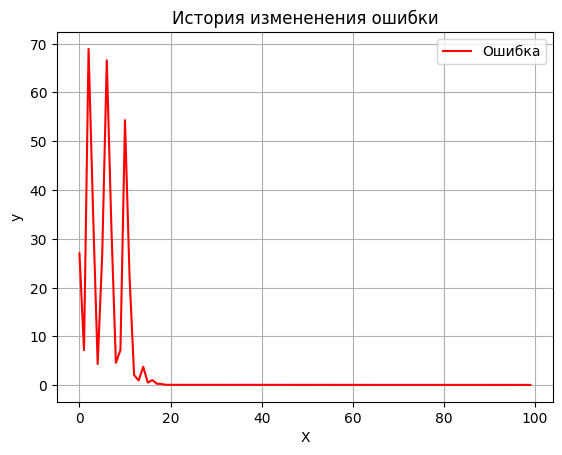

In [13]:
#width = 15
#height = 10
#plt.figure(figsize=(width, height))
#plt.ylim(-0.5, 1.5)
i = [j for j in range(len(hist_err))]          
plt.plot(i, hist_err, color='red', label='Ошибка') 
plt.title('История измененения ошибки')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

**Задание 3.5.** Нарисуйте датасет и модели линейной регрессии и логистической регрессии на плоскости:

In [14]:
# Функция отрисовки различных графиков
# w_l_r - веса линейной регрессии
# line_w_log_r - функция-аргумент сигмоиды
# w_log_r - веса логистической регрессии
# w_LR - веса логистической регрессии LogisticRegression

def graph(X, y, w_l_r=[], w_log_r=[], line_w_log_r=False, w_LR=[], line_LR=False, w_SGDCl=[], line_SGDCl=False):
    x = np.array([np.ones(X.shape[0]), X]).T
    width = 15
    height = 10
    plt.figure(figsize=(width, height))
    plt.ylim(-0.5, 1.5)
          
    plt.scatter(X, y, color='blue', label='Данные')  # Точки датасета
    if len(w_l_r) != 0: 
        y_lin_reg_line = lin_f(x, w_l_r)  # Предсказания модели линейной регрессии для этих значений X
        plt.plot(X, y_lin_reg_line, color='red', label='Линия линейной регрессии')  # Линия линейной регрессии
    if len(w_log_r) != 0:
        y_log_reg_line = y_pred(x, w_log_r)  # Предсказания модели линейной регрессии для этих значений X
        plt.plot(X, y_log_reg_line, color='green', label='Линия логистической регрессии')  # Линия логистической регрессии
    if line_w_log_r: 
        y_lin_log_reg_line = lin_f(x, w_log_r)  # Прямая аргумента сигмоиды в логистической регрессии
        plt.plot(X, y_lin_log_reg_line, color='yellow', label='Прямая аргумента сигмоиды в логистической регрессии')  # Линия прямой аргумента сигмоиды в логистической регрессии
    if len(w_LR) != 0:
        y_LR_line = y_pred(x, w_LR)  # Предсказания модели линейной регрессии для этих значений X
        plt.plot(X, y_LR_line, color='brown', label='Линия логистической регрессии по LogisticRegression')  # Линия логистической регрессии
    if line_LR:
        y_lin_LR_line = lin_f(x, w_LR)  # Прямая аргумента сигмоиды в логистической регрессии
        plt.plot(X, y_lin_LR_line, color='black', label='Прямая аргумента сигмоиды в LogisticRegression')  # Линия логистической регрессии
    if len(w_SGDCl) != 0:
        y_SGDCl_line = y_pred(x, w_SGDCl)  # Предсказания модели линейной регрессии для этих значений X
        plt.plot(X, y_SGDCl_line, color='purple', label='Линия логистической регрессии по SGDClassifier')  # Линия логистической регрессии
    if line_SGDCl:
        y_lin_SGDCl_line = lin_f(x, w_SGDCl)  # Прямая аргумента сигмоиды в логистической регрессии
        plt.plot(X, y_lin_SGDCl_line, color='olive', label='Прямая аргумента сигмоиды в SGDClassifier')  # Линия логистической регрессии
        
    plt.title('Линейная и логистическая регрессии')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

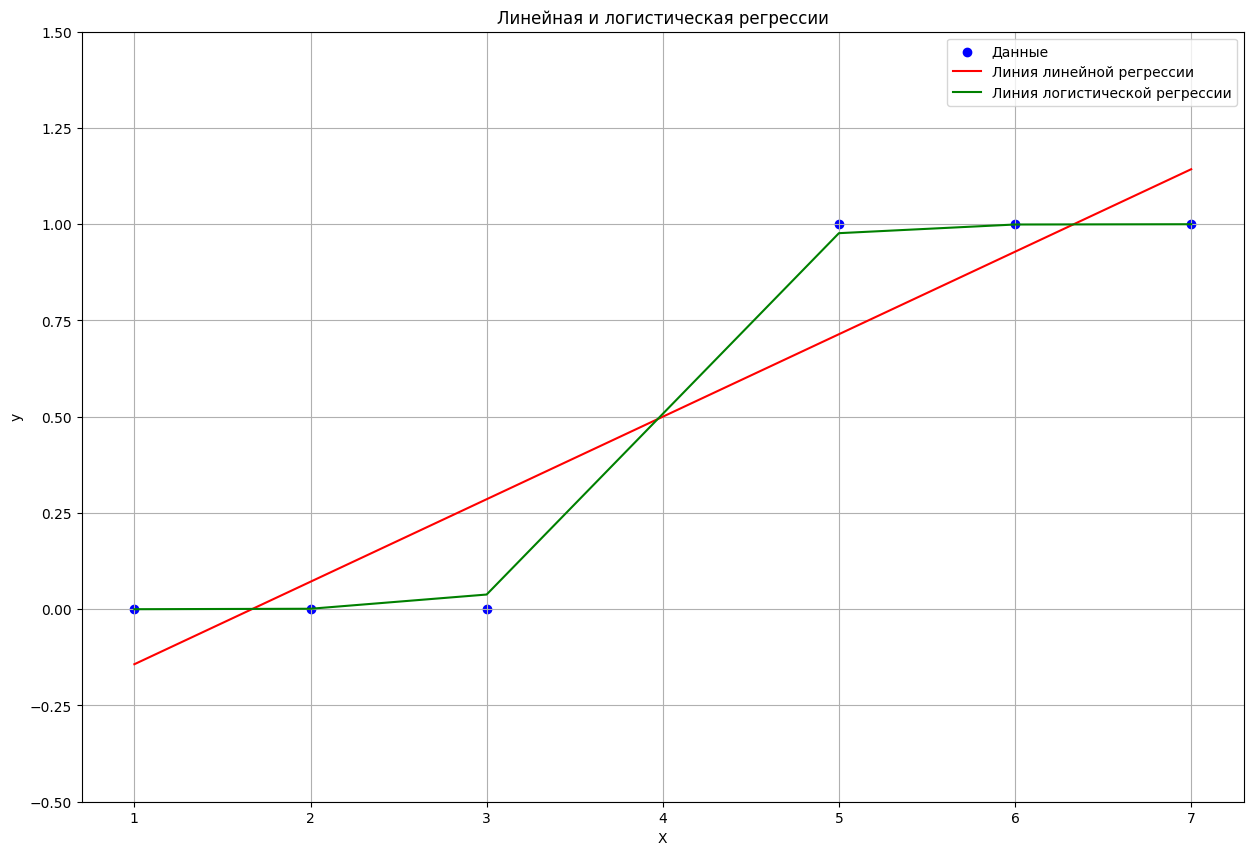

In [15]:
#  Ваш код здесь
graph(X, y, w_l_r=w_lin_reg, w_log_r=w_log_reg)

**Задание 3.6.** Ответьте на вопрос: почему модель линейной регрессии не слишком подходит для решения задачи классификации?  

Проиллюстрируйте ответ, добавив в датасет далеко отстоящий пример (или примеры), перестроив и нарисовав снова обе модели – линейную и логистическую регрессии.

Модель линейной регрессии не слишком подходит для решения задачи классификации по нескольким причинам:
1) предположение о линейности (линейная регрессия предполагает, что зависимая переменная (целевой признак) является линейной комбинацией независимых переменных. В задачах классификации целевая переменная обычно принимает дискретные значения (например, классы), что не соответствует предположению о линейной зависимости);
2) непрерывность выходных значений (в линейной регрессии предсказываемые значения могут принимать любые значения на числовой оси, включая отрицательные. В задачах классификации, особенно бинарной, целевая переменная должна принимать только определенные значения (например, 0 и 1). Это может привести к проблемам, если модель предсказывает значения вне диапазона [0, 1]);
3) отсутствие вероятностной интерпретации (линейная регрессия не предоставляет вероятностной интерпретации предсказаний. В задачах классификации важно знать вероятность принадлежности объекта к тому или иному классу, что позволяет принимать более обоснованные решения. Для этого лучше подходят модели, такие как логистическая регрессия, которые используют сигмоидальную функцию для преобразования линейного предсказания в вероятность);
4) проблемы с границами принятия решений (линейная регрессия создает линейные границы принятия решений, что может быть недостаточно для сложных задач классификации, где классы могут быть разделены нелинейно);
5) чувствительность к выбросам (линейная регрессия чувствительна к выбросам, которые могут значительно исказить результаты. В задачах классификации выбросы могут привести к неправильной классификации объектов).

Вектор весов линейной регрессии: [0.3537159  0.02822201]
Вектор весов логистической регрессии: [-14.68857829   3.73511031]


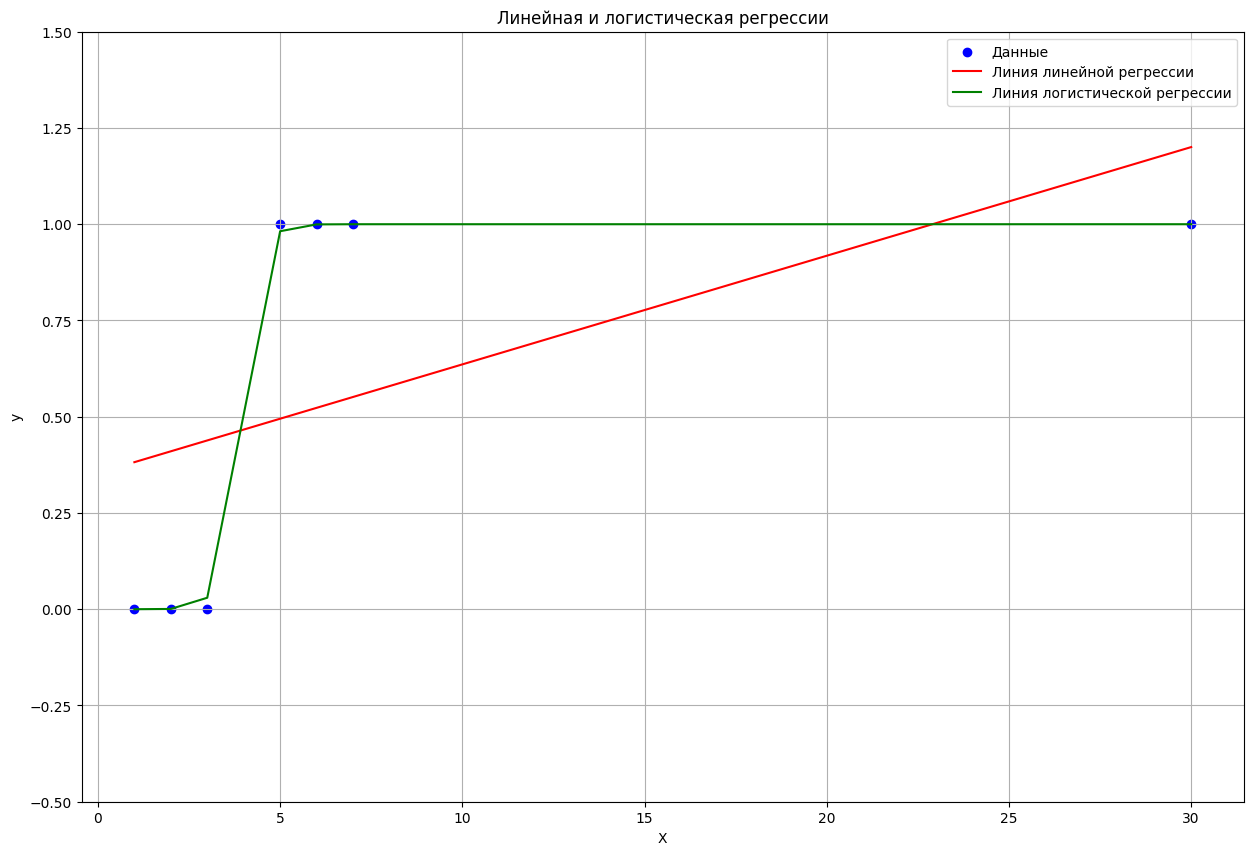

In [16]:
#  Ваш код здесь
X = np.array([1, 2, 3, 5, 6, 7, 30])
y = np.array([0, 0, 0, 1, 1, 1, 1])

# Линейная регрессия
w_lin_reg_prim = get_weight(X, y)
print('Вектор весов линейной регрессии:', w_lin_reg_prim)

# Логистическая регрессия
hist_err = []
w_log_reg_prim, k, hist_err = gradient_descent(X, y, w_0, learn_rate = learning_rate, n_iter = step_number)
print('Вектор весов логистической регрессии:', w_log_reg_prim)

# Построение графиков
graph(X, y, w_l_r=w_lin_reg_prim, w_log_r=w_log_reg_prim)

### Задание 4. Постройте прямую для аргумента логистической регрессии

**Задание 4.1.** Постройте модели линейной регрессии и логистической регрессии для исходного датасета.  

Выведите веса обеих моделей.

In [17]:
X = [1, 2, 3, 5, 6, 7]
y = [0, 0, 0, 1, 1, 1]

In [18]:
#  Ваш код здесь
X = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])

**Задание 4.2.** Нарисуйте на одном графике:
- датасет;
- модель линейной регрессии;
- модель логистической регрессии;
- прямую для скалярного произведения $<\overrightarrow{w},\overrightarrow{x}>$ из модели логистической регрессии.

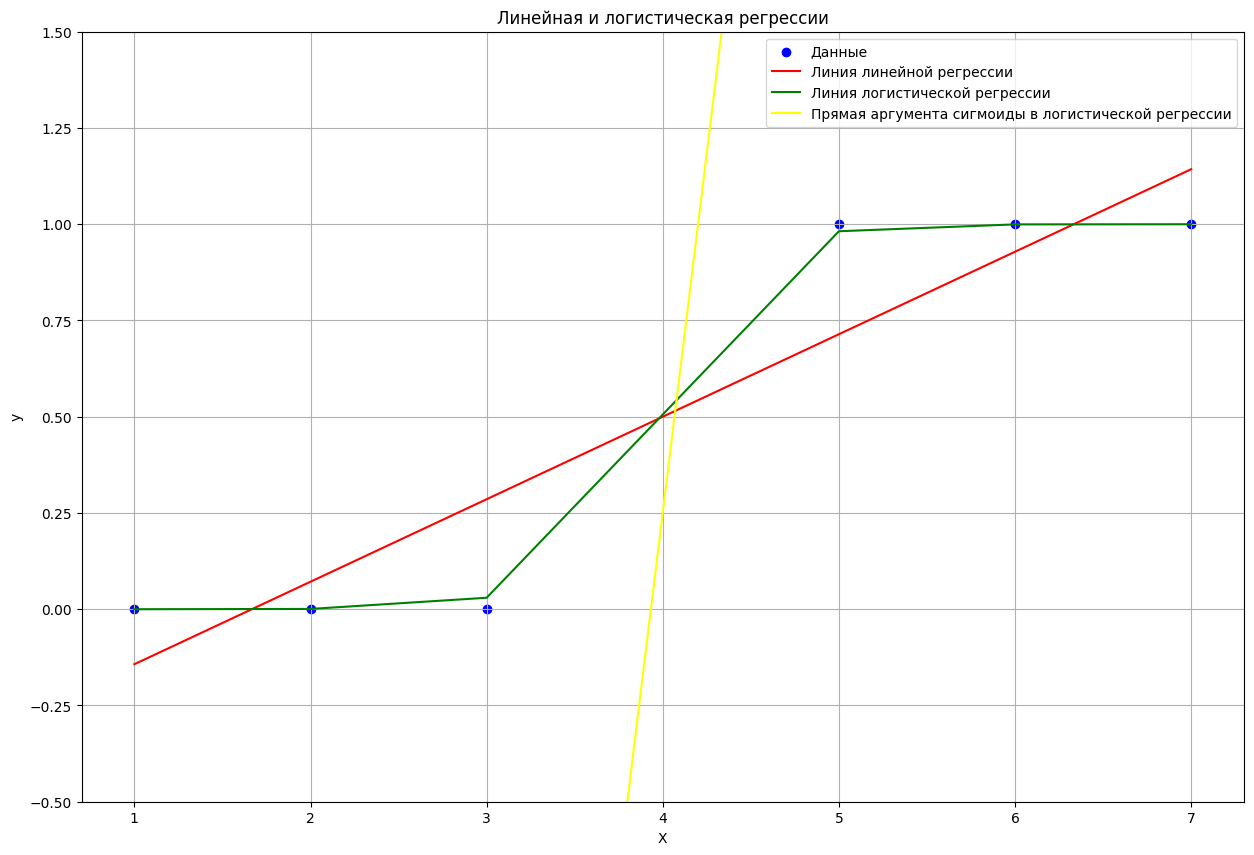

In [19]:
graph(X, y, w_l_r=w_lin_reg, w_log_r=w_log_reg, line_w_log_r=True)

**Задание 4.3.** Ответьте на вопросы:  
- Почему прямая для аргумента логистической регрессии имеет такой вид?  
- Как наклон этой прямой связан с весами модели?
- Как наклон сигмоиды связан с весами модели?

Логистическая регрессия использует сигмоидальную функцию для преобразования линейной комбинации входных признаков в вероятность. Эта функция имеет S-образную форму и асимптотически приближается к 0 и 1. Чем больше угол отклонения прямой аргумента сигмоидальной функции от оси Ох, тем круче переход значений сигмоидальной функции от значений, близких к 0, к значениям, близким к 1.
Чем больше вес w1, тем больше угол отклонения прямой аргумента от оси Ох, т.к. w1 - это тангес угла наклона, а тангес - это возрастающая функция от 0 до бесконечности функция на полуинтервале [0, pi/2). Вес w0 в графика аргумента отвечает лишь за смещение графика вдоль оси н относительно 0.
Чем больше вес w1, тем круче изгиб сигмоиды.


### Задание 5. Сравните результаты с `scikit-learn`  

**Задание 5.1.** Постройте модель логистической регрессии для датасета из лекции с помощью класса `LogisticRegression` из `scikit-learn`.  
Выведите веса модели и сравните с весами логистической регрессии, построенной вами.

In [20]:
X = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])

# Нахождение весов логистической регрессии средствами LogisticRegression из sklearn.linear_model
from sklearn.linear_model import LogisticRegression
x = X.reshape(-1, 1)
clf = LogisticRegression(penalty=None, fit_intercept=True, random_state=0).fit(x, y) 
print('Предсказание модели для задачи классификации:', clf.predict(x))
y_LogisticRegression = clf.predict_proba(x)[:,1]
print('Предсказание модели логистической регресии (значение сигмоиды):', y_LogisticRegression)
print('score:', clf.score(x, y))
w_LogisticRegression = np.concatenate([[clf.intercept_][0], clf.coef_[0]])
print('Веса модели LogisticRegression:', w_LogisticRegression)
print('Веса модели собственной реализации:', w_log_reg)

Предсказание модели для задачи классификации: [0 0 0 1 1 1]
Предсказание модели логистической регресии (значение сигмоиды): [4.30234473e-10 6.26044639e-07 9.10144794e-04 9.99481835e-01
 9.99999644e-01 1.00000000e+00]
score: 1.0
Веса модели LogisticRegression: [-28.849538     7.28284724]
Веса модели собственной реализации: [-14.68857829   3.73511031]


**Задание 5.2.** Нарисуйте на одном графике:
- датасет;
- модель логистической регрессии, построенной вами;
- модель логистической регрессии, построенной с помощью `scikit-learn`.

Объясните, в чем причины отличий между моделями (если они будут иметь место).

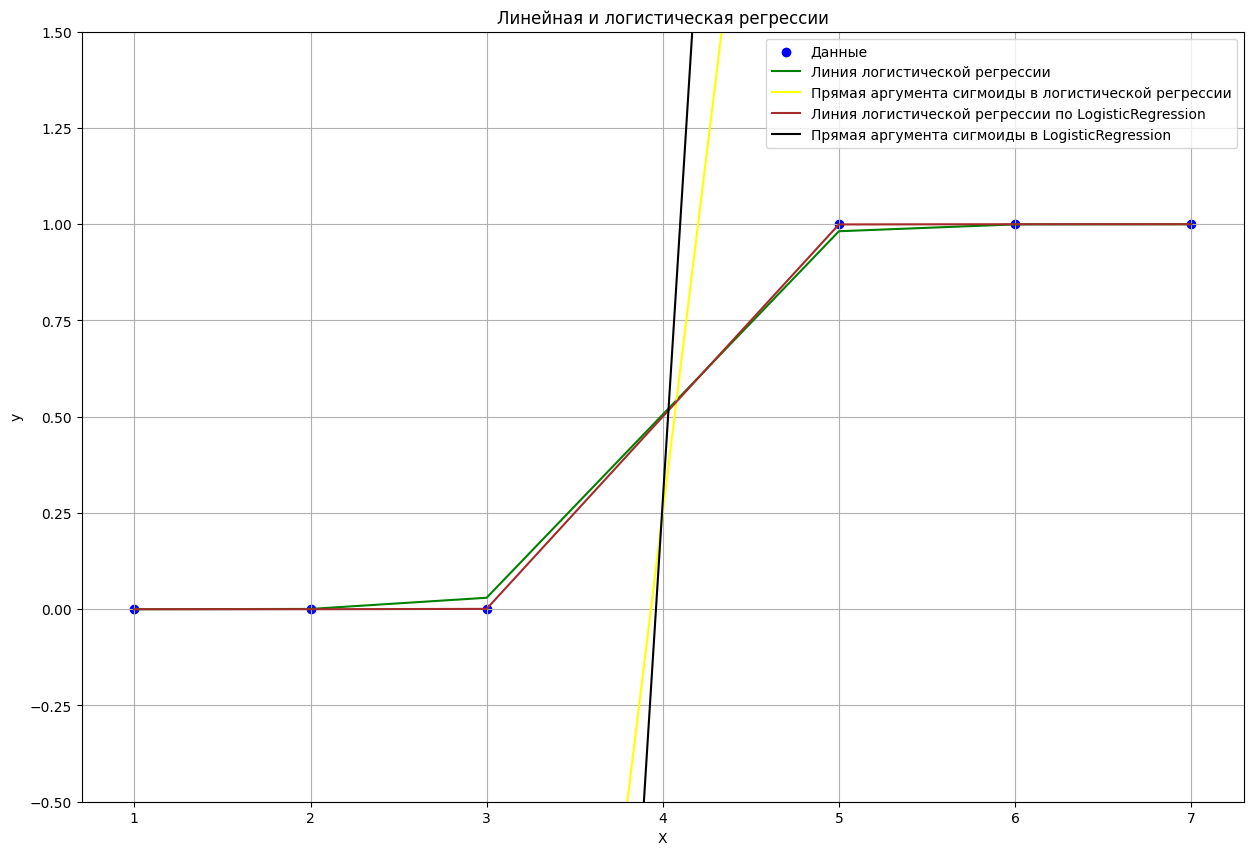

In [21]:
#  Ваш код здесь
graph(X, y, w_log_r=w_log_reg, line_w_log_r=True, w_LR=w_LogisticRegression, line_LR=True)

Различия в моделях незначительны. Они могут быть связаны с разными скоростью обучения и допустимой погрешностью по умолчанию в  LogisticRegression (c = 1.0, eps = 1е-4). 

### Задание 6. `SGDClassifier`
[`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) – класс из `scikit-learn`, реализующий градиентный спуск с разными функциями ошибки и, таким образом, соответствующий разным моделям:
- для функции ошибки `log_loss` (кросс-энтропия) – логистическая регрессия;
- для функции ошибки `hinge ` – метод опорных векторов (SVM);
- для функции ошибки `perceptron` – персептрон (вид нейронных сетей).  

С помощью `SGDClassifier` можно понять, что эти модели, несмотря на разные соображения, приведшие к их созданию, отличаются по большому счету только функциями ошибки, а градиентный спуск представляет собой универсальный метод оптимизации.

**Задание 6.1.** Постройте модель логистической регрессии для датасета из лекции с помощью `SGDClassifier`.  
Выведите веса модели и сравните их с весами своей модели и модели, построенной с помощью `LogisticRegression`.

In [22]:
#  Ваш код здесь
X = np.array([1, 2, 3, 5, 6, 7])
y = np.array([0, 0, 0, 1, 1, 1])

# Нахождение весов логистической регрессии средствами SGDClassifier из sklearn.linear_model
from sklearn.linear_model import SGDClassifier
x = X.reshape(-1, 1)
clf = SGDClassifier(loss="log_loss", penalty=None, fit_intercept=True, random_state=0).fit(x, y)
print('Предсказание модели для задачи классификации:', clf.predict(x))
y_SGDClassifier = clf.predict_proba(x)[:,1]
print('Предсказание модели логистической регресии (значение сигмоиды):', y_SGDClassifier)
print('score:', clf.score(x, y))
w_SGDClassifier = np.concatenate([[clf.intercept_][0], clf.coef_[0]])
print('Веса модели SGDClassifier:', w_SGDClassifier)
print('Веса модели LogisticRegression:', w_LogisticRegression)
print('Веса модели собственной реализации:', w_log_reg)

Предсказание модели для задачи классификации: [0 0 0 1 1 1]
Предсказание модели логистической регресии (значение сигмоиды): [7.73601942e-12 8.64224855e-08 9.64532654e-04 9.99991701e-01
 9.99999999e-01 1.00000000e+00]
score: 1.0
Веса модели SGDClassifier: [-34.90624983   9.32111599]
Веса модели LogisticRegression: [-28.849538     7.28284724]
Веса модели собственной реализации: [-14.68857829   3.73511031]


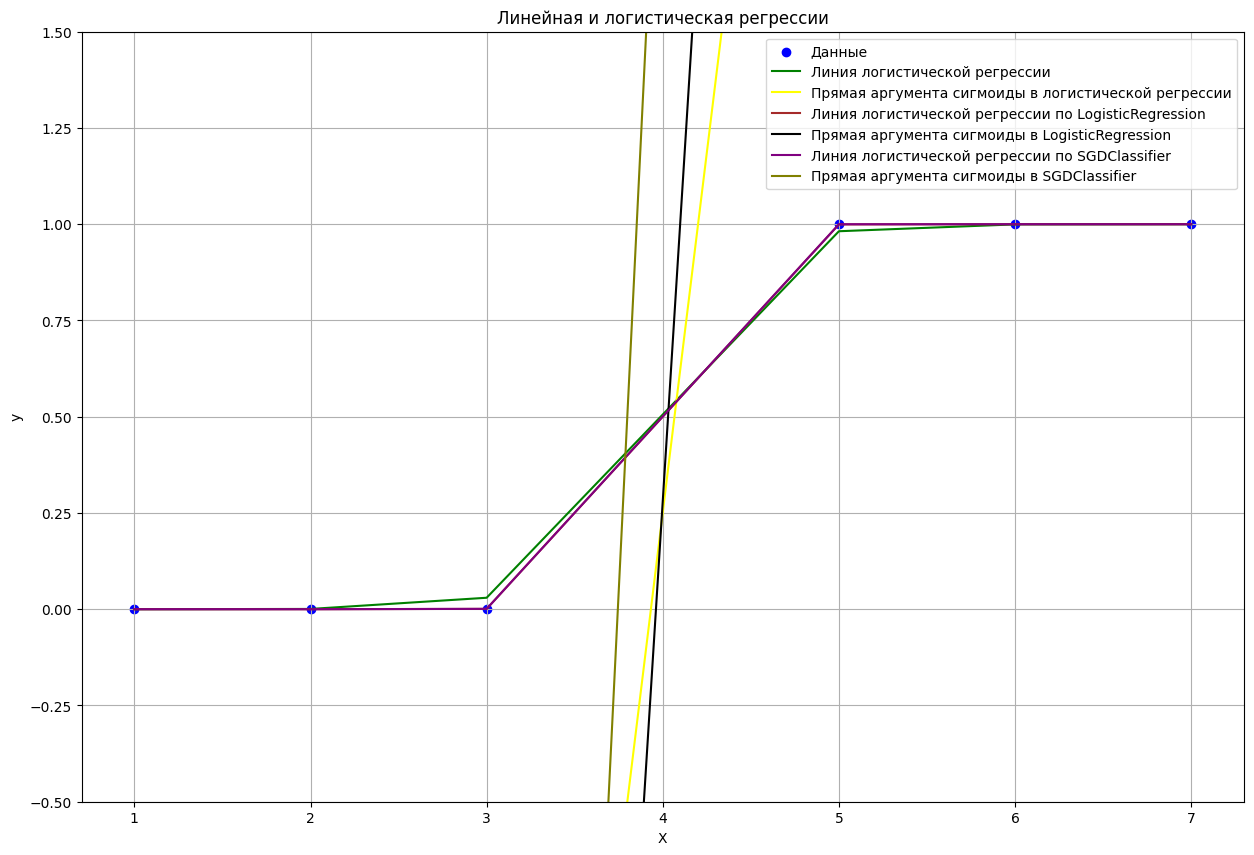

In [23]:
graph(X, y, w_log_r=w_log_reg, line_w_log_r=True, w_LR=w_LogisticRegression, line_LR=True, w_SGDCl=w_SGDClassifier, line_SGDCl=True)